# Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

# File and Data Field Descriptions
1. train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
2. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. 3. 3. People in a group are often family members, but not always.
4. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
5. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
6. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
7. Destination - The planet the passenger will be debarking to.
8. Age - The age of the passenger.
9. VIP - Whether the passenger has paid for special VIP service during the voyage.
10. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
11. Name - The first and last names of the passenger.
12. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
13. test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
14. sample_submission.csv - A submission file in the correct format.
15. PassengerId - Id for each passenger in the test set.
16. Transported - The target. For each passenger, predict either True or False.

# Set up the notebook

In [39]:
# import pandas for dataframe capabilities
import pandas as pd

#import np for numpy operations
import numpy as np

#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

#import graphing tools
import seaborn as sbn
import matplotlib.pyplot as plt

#import machine learning models
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# Read in the dataset

In [40]:
# read in the train set and the test set
df = pd.read_csv('train.csv')
df_test_final = pd.read_csv('test.csv')

# Check the first few records

In [41]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Check basics of dataframe

## Get the size of the dataset

In [42]:
df.shape

(8693, 14)

## Get the datatypes of the dataset

In [43]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## Check for null values

In [44]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Fill in Null Values

In [45]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()) 
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode())
df['Destination'] = df['Destination'].fillna(df['Destination'].mode())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())
df['Name'] = df['Name'].fillna(df['Name'].mode())
df['VIP'] = df['VIP'].fillna(df['VIP'].mode())

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())

In [46]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

## Check for number of unique values per feature

In [47]:
df.nunique(axis=0)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               81
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Name            8473
Transported        2
dtype: int64

## Check statistics of the data

In [48]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Perform initial data preprocessing

## Process the Passeneger ID
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. 3. 3. People in a group are often family members, but not always.

In [49]:
df['GroupID'] = df['PassengerId'].apply(lambda x: int(x.split('_')[0]))
df['PersonID'] = df['PassengerId'].apply(lambda x: int(x.split('_')[1]))
df.drop('PassengerId',axis=1,inplace=True)

In [50]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


## Process the HomePlanet

In [51]:
#create encoder and fit to the homeplanet attribute
planetencoder = LabelEncoder()
planetencoder.fit(df['HomePlanet'])

#apply the ;label encoder
df['HomePlanet'] = planetencoder.transform(df['HomePlanet'])
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID
0,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


## Process CryoSleep, VIP and Transported Attributes

In [52]:
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: 1 if x else 0)
df['VIP'] = df['CryoSleep'].apply(lambda x: 1 if x else 0)
df['Transported'] = df['Transported'].apply(lambda x: 1 if x else 0)

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID
0,1,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1
1,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1
2,1,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1
3,1,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2
4,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1


## Process the Cabin
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [53]:
df['Cabin'] = df['Cabin'].astype(str)

### Parse the deck num

In [54]:
# parse the deck from the cabin
df['Deck'] = df['Cabin'].apply(lambda x: 'nan' if x == 'nan' else x.split('/')[0])

deckencoder = LabelEncoder()
deckencoder.fit(df['Deck'])

df['Deck'] = deckencoder.transform(df['Deck'])
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck
0,1,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1
1,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5
2,1,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0
3,1,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0
4,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5


### Parse the cabin num

In [55]:
df['CabinNum'] = (df['Cabin'].apply(lambda x: -1 if x == 'nan' else x.split('/')[1])).astype(int)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck,CabinNum
0,1,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1,0
1,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5,0
2,1,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0
3,1,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0,0
4,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5,1


### Parse the cabin side

In [56]:
df['Side'] = df['Cabin'].apply(lambda x: 'nan' if x == 'nan' else x.split('/')[2])
sideencoder = LabelEncoder()
sideencoder.fit(df['Side'])

df['Side'] = sideencoder.transform(df['Side'])
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck,CabinNum,Side
0,1,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1,0,0
1,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5,0,1
2,1,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0,1
3,1,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0,0,1
4,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5,1,1


### Remove the Cabin Feature

In [57]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck,CabinNum,Side
0,1,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1,0,0
1,0,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5,0,1
2,1,0,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0,1
3,1,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0,0,1
4,0,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5,1,1


## Process the Destination
Destination - The planet the passenger will be debarking to.

In [58]:
destinationencoder  = LabelEncoder()
destinationencoder.fit(df['Destination'])

df['Destination'] = destinationencoder.transform(df['Destination'])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5,0,1
2,1,0,2,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5,1,1


## Calculate Total Spent on Services

In [59]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PersonID,Deck,CabinNum,Side,TotalSpent
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,1,0,0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,5,0,1,736.0
2,1,0,2,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0,1,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,0,0,1,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,5,1,1,1091.0


## Process Name

In [60]:
df['Name'] = df['Name'].astype(str)
df['FirstName'] = df['Name'].apply(lambda x: 'nan' if x == 'nan' else x.split(' ')[0])
df['LastName'] = df['Name'].apply(lambda x: 'nan' if x == 'nan' else x.split(' ')[1])

df.drop('Name',axis=1,inplace=True)

# Check Df

In [61]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
GroupID         0
PersonID        0
Deck            0
CabinNum        0
Side            0
TotalSpent      0
FirstName       0
LastName        0
dtype: int64

# Data Exploration

## Check for Relationships in the Data

<Axes: xlabel='TotalSpent', ylabel='Count'>

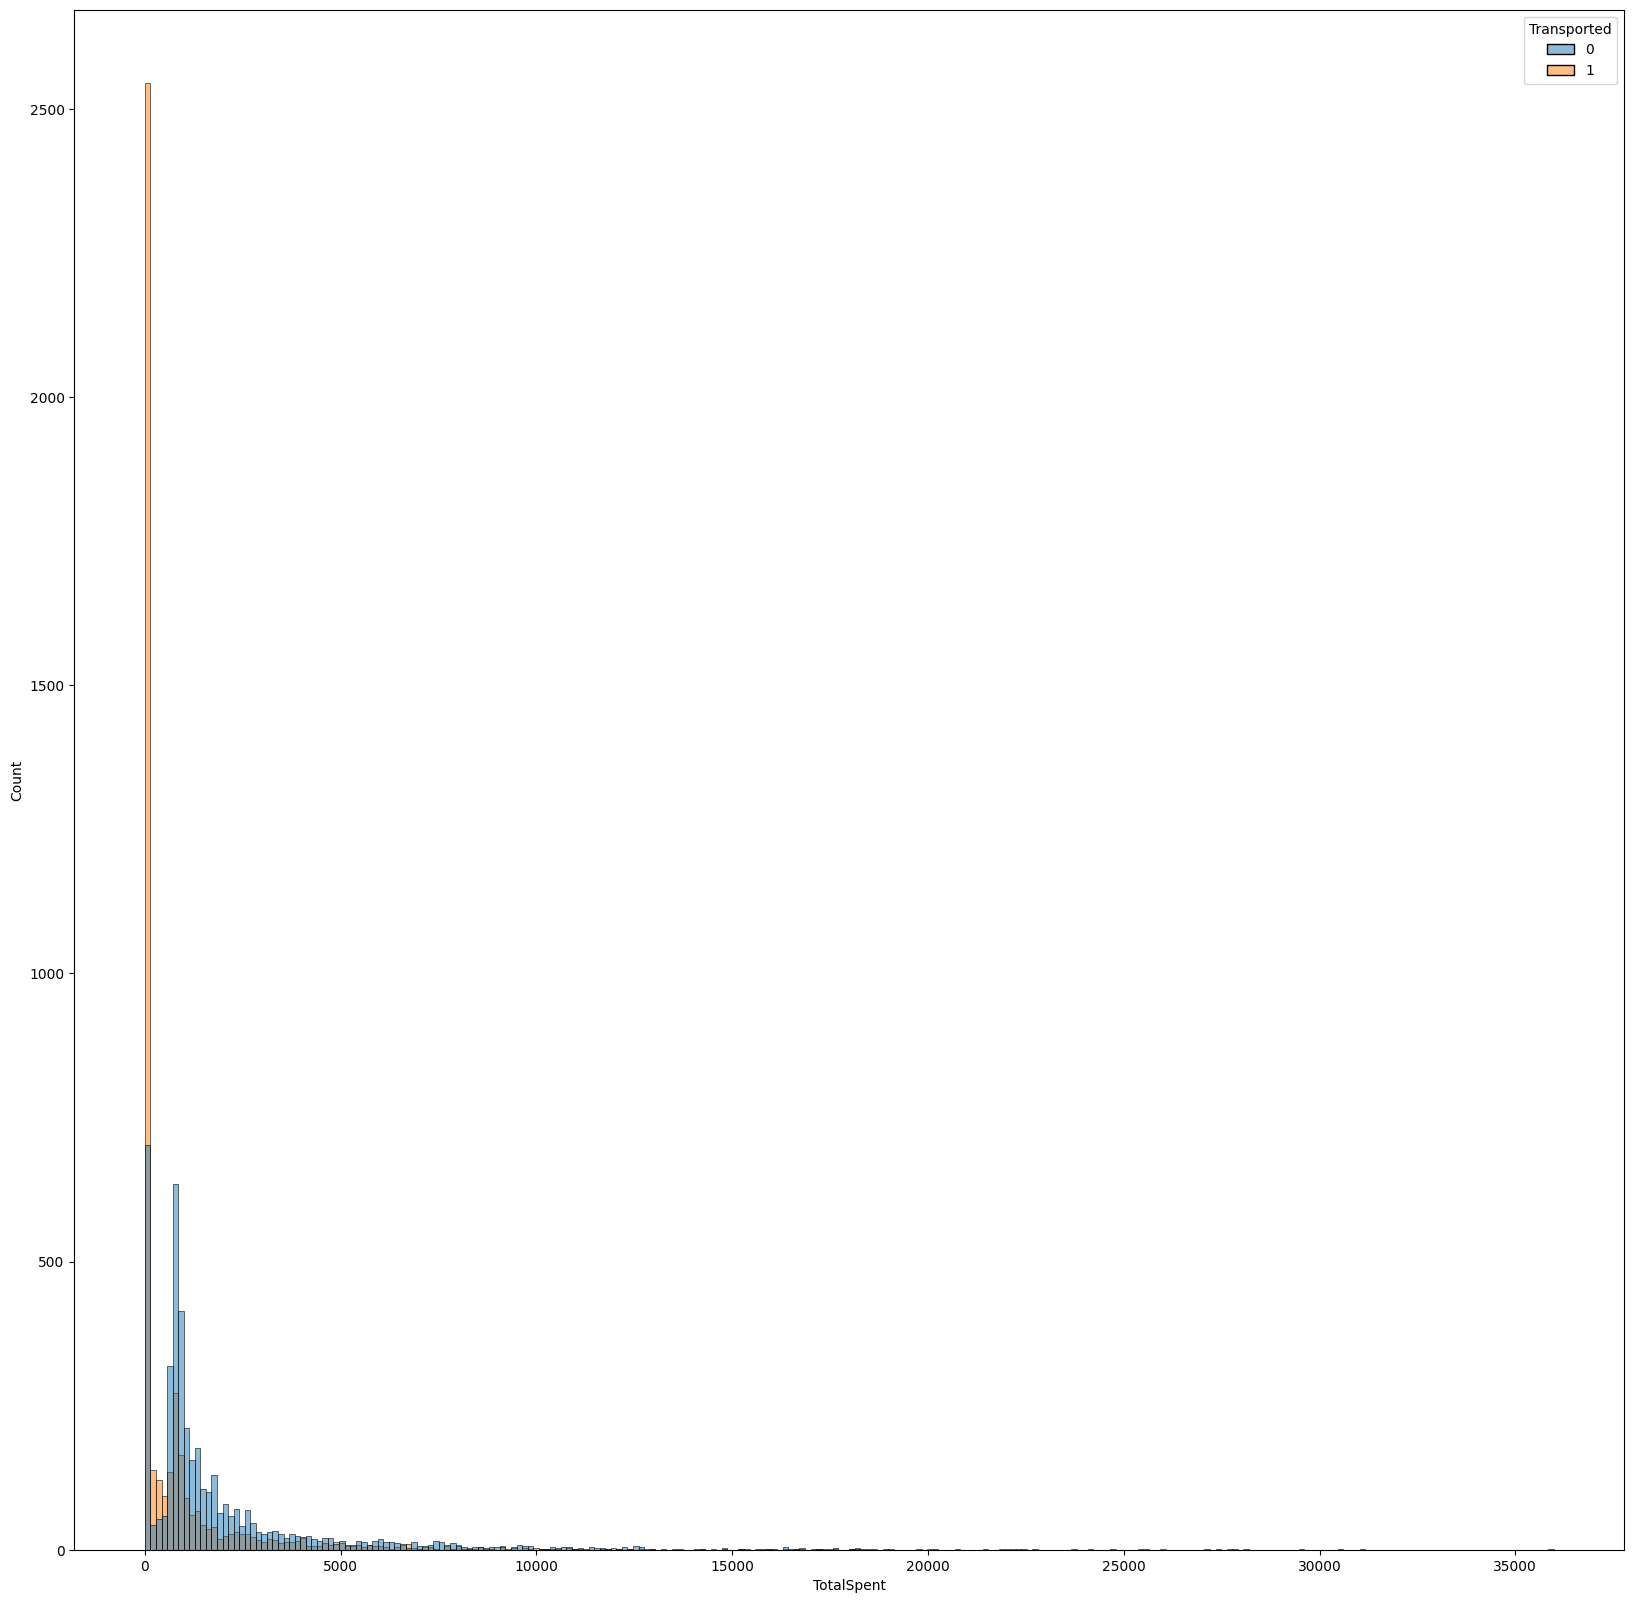

In [62]:
fig = plt.figure(figsize=(20,20))
sbn.histplot(df,x='TotalSpent',hue='Transported')

<Axes: xlabel='Transported', ylabel='count'>

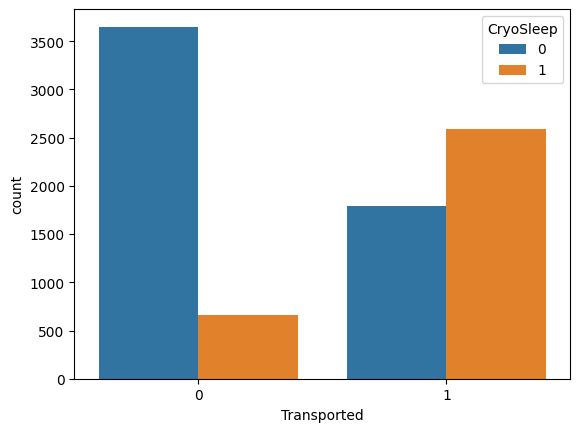

In [63]:
sbn.countplot(df,x='Transported',hue='CryoSleep')

<Axes: xlabel='Transported', ylabel='count'>

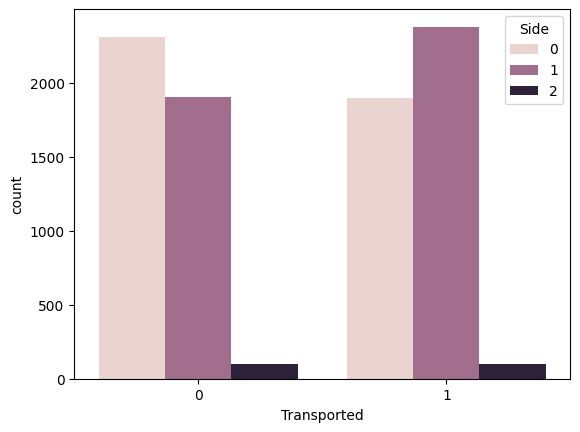

In [64]:
sbn.countplot(df,x='Transported',hue='Side')

<Figure size 2000x2000 with 0 Axes>

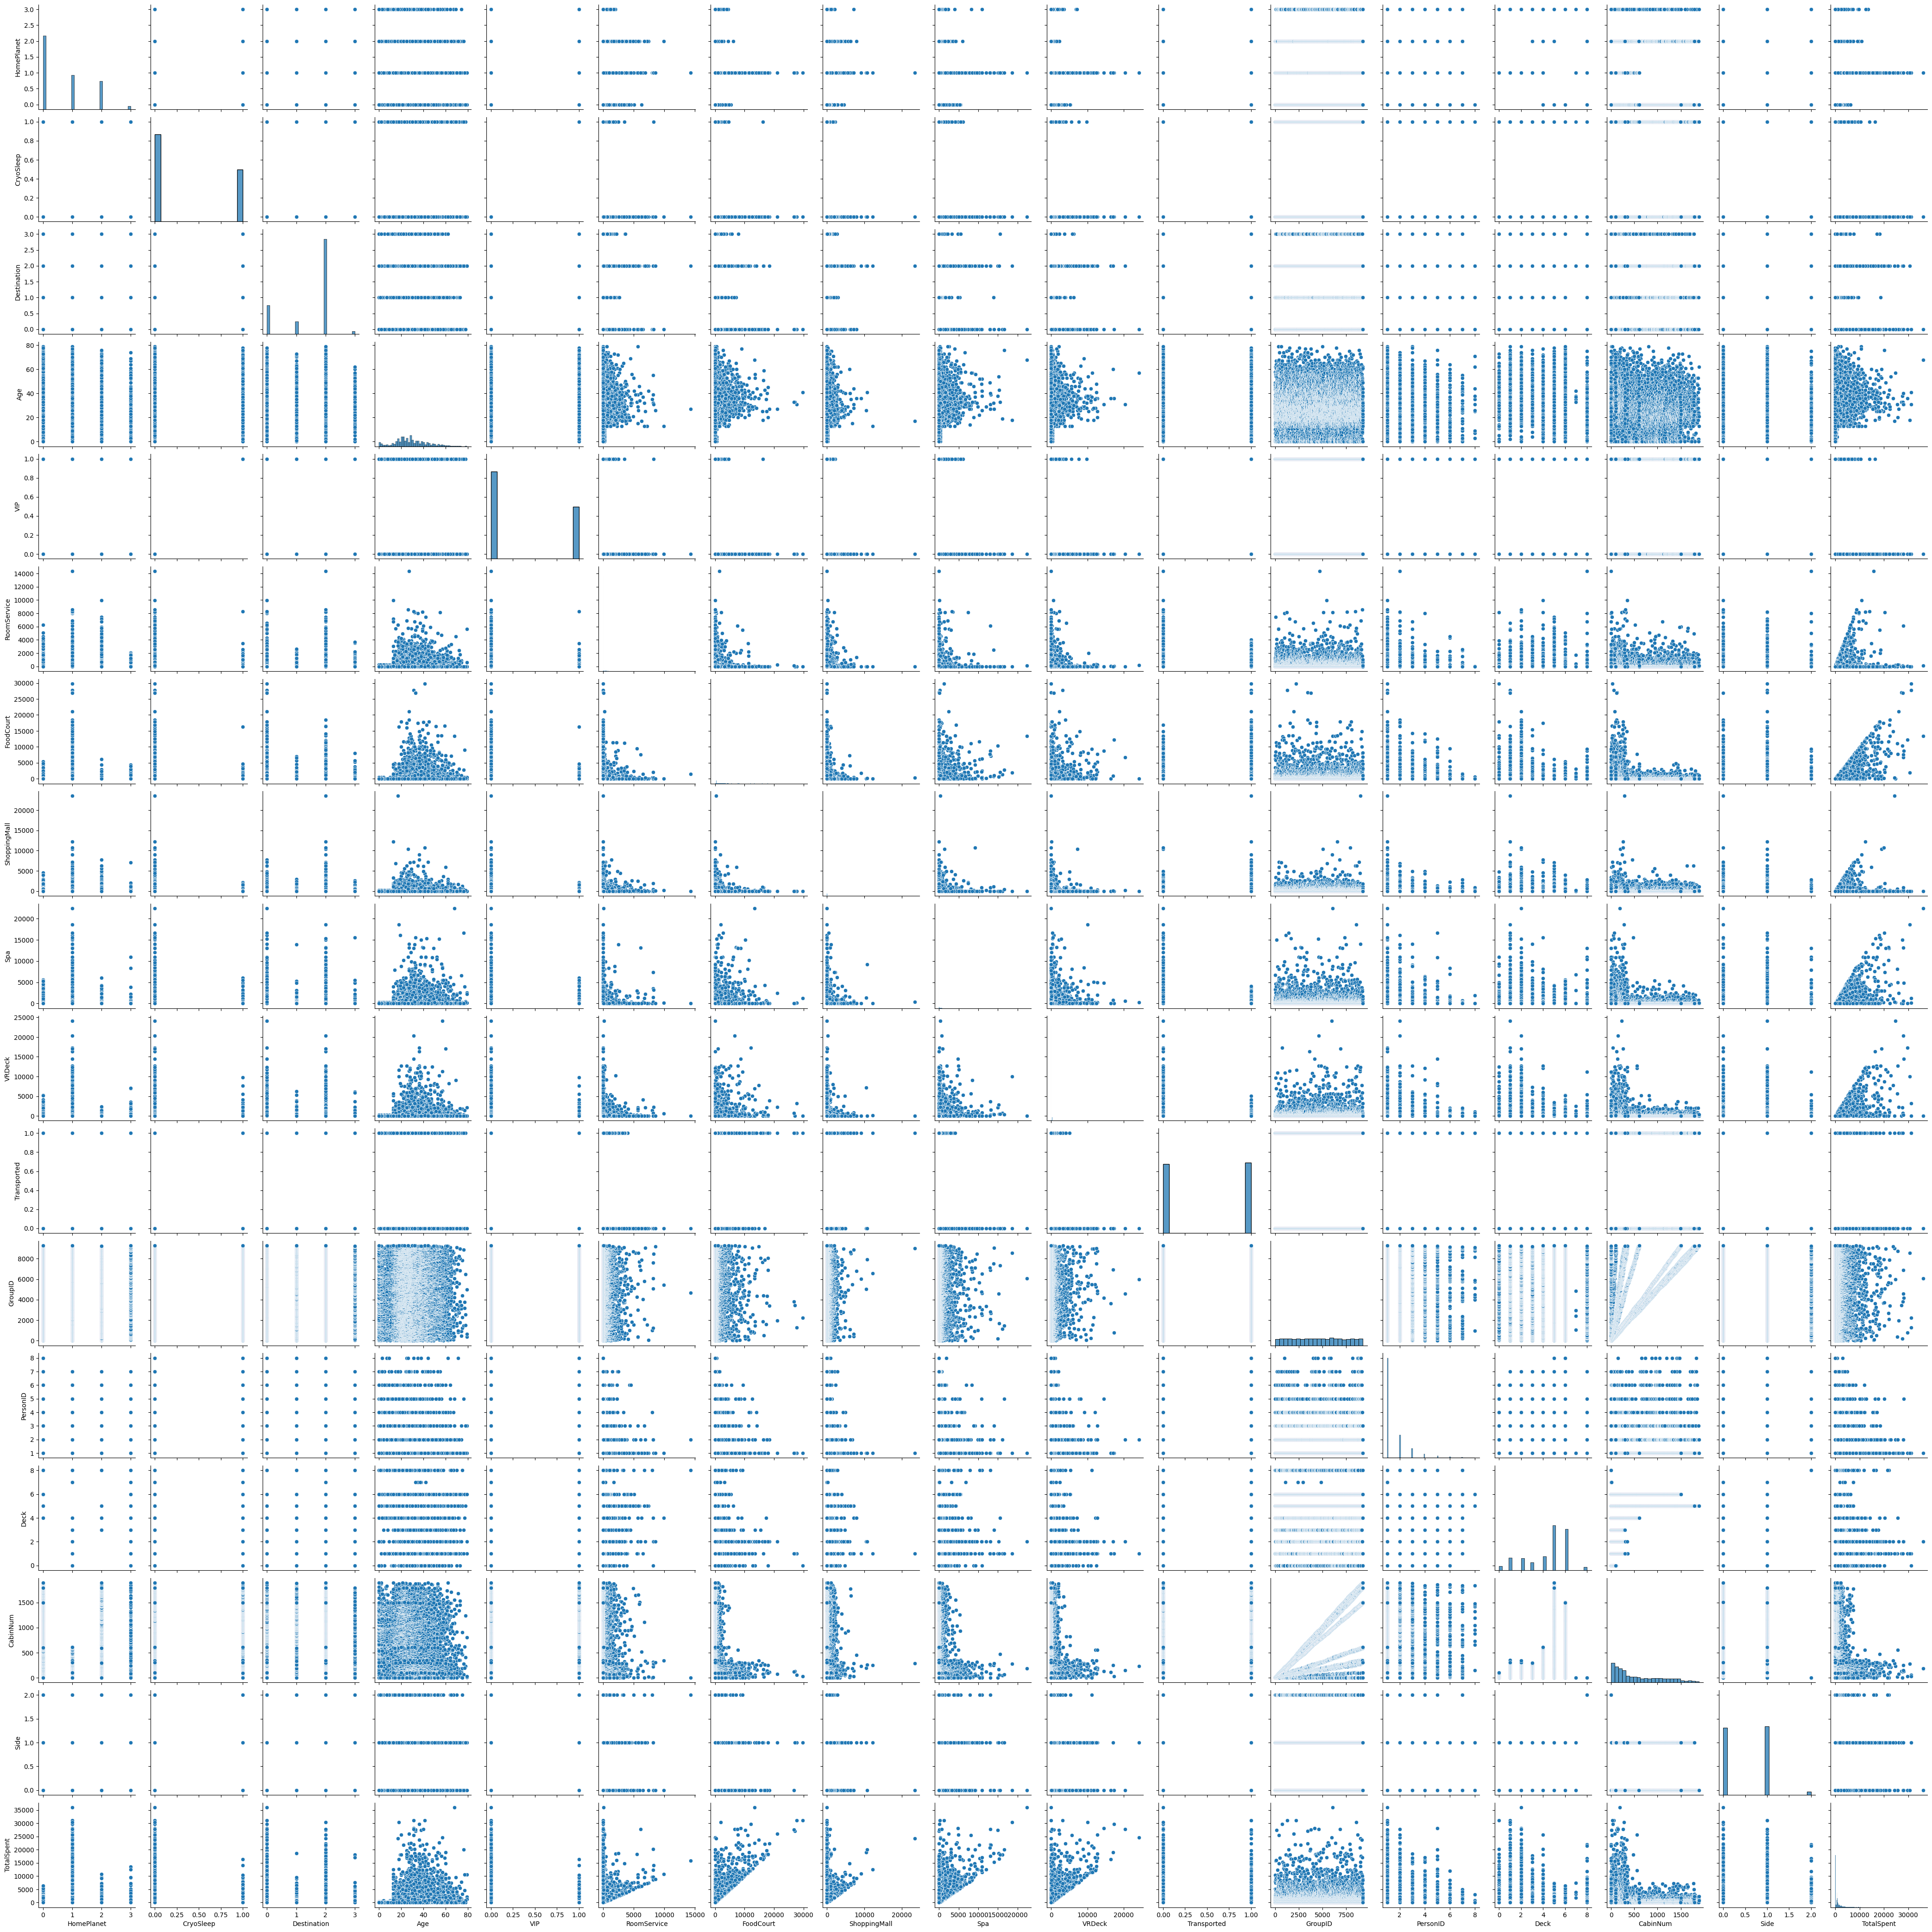

In [65]:
fig = plt.figure(figsize=(20,20))
sbn.pairplot(df)

<Axes: >

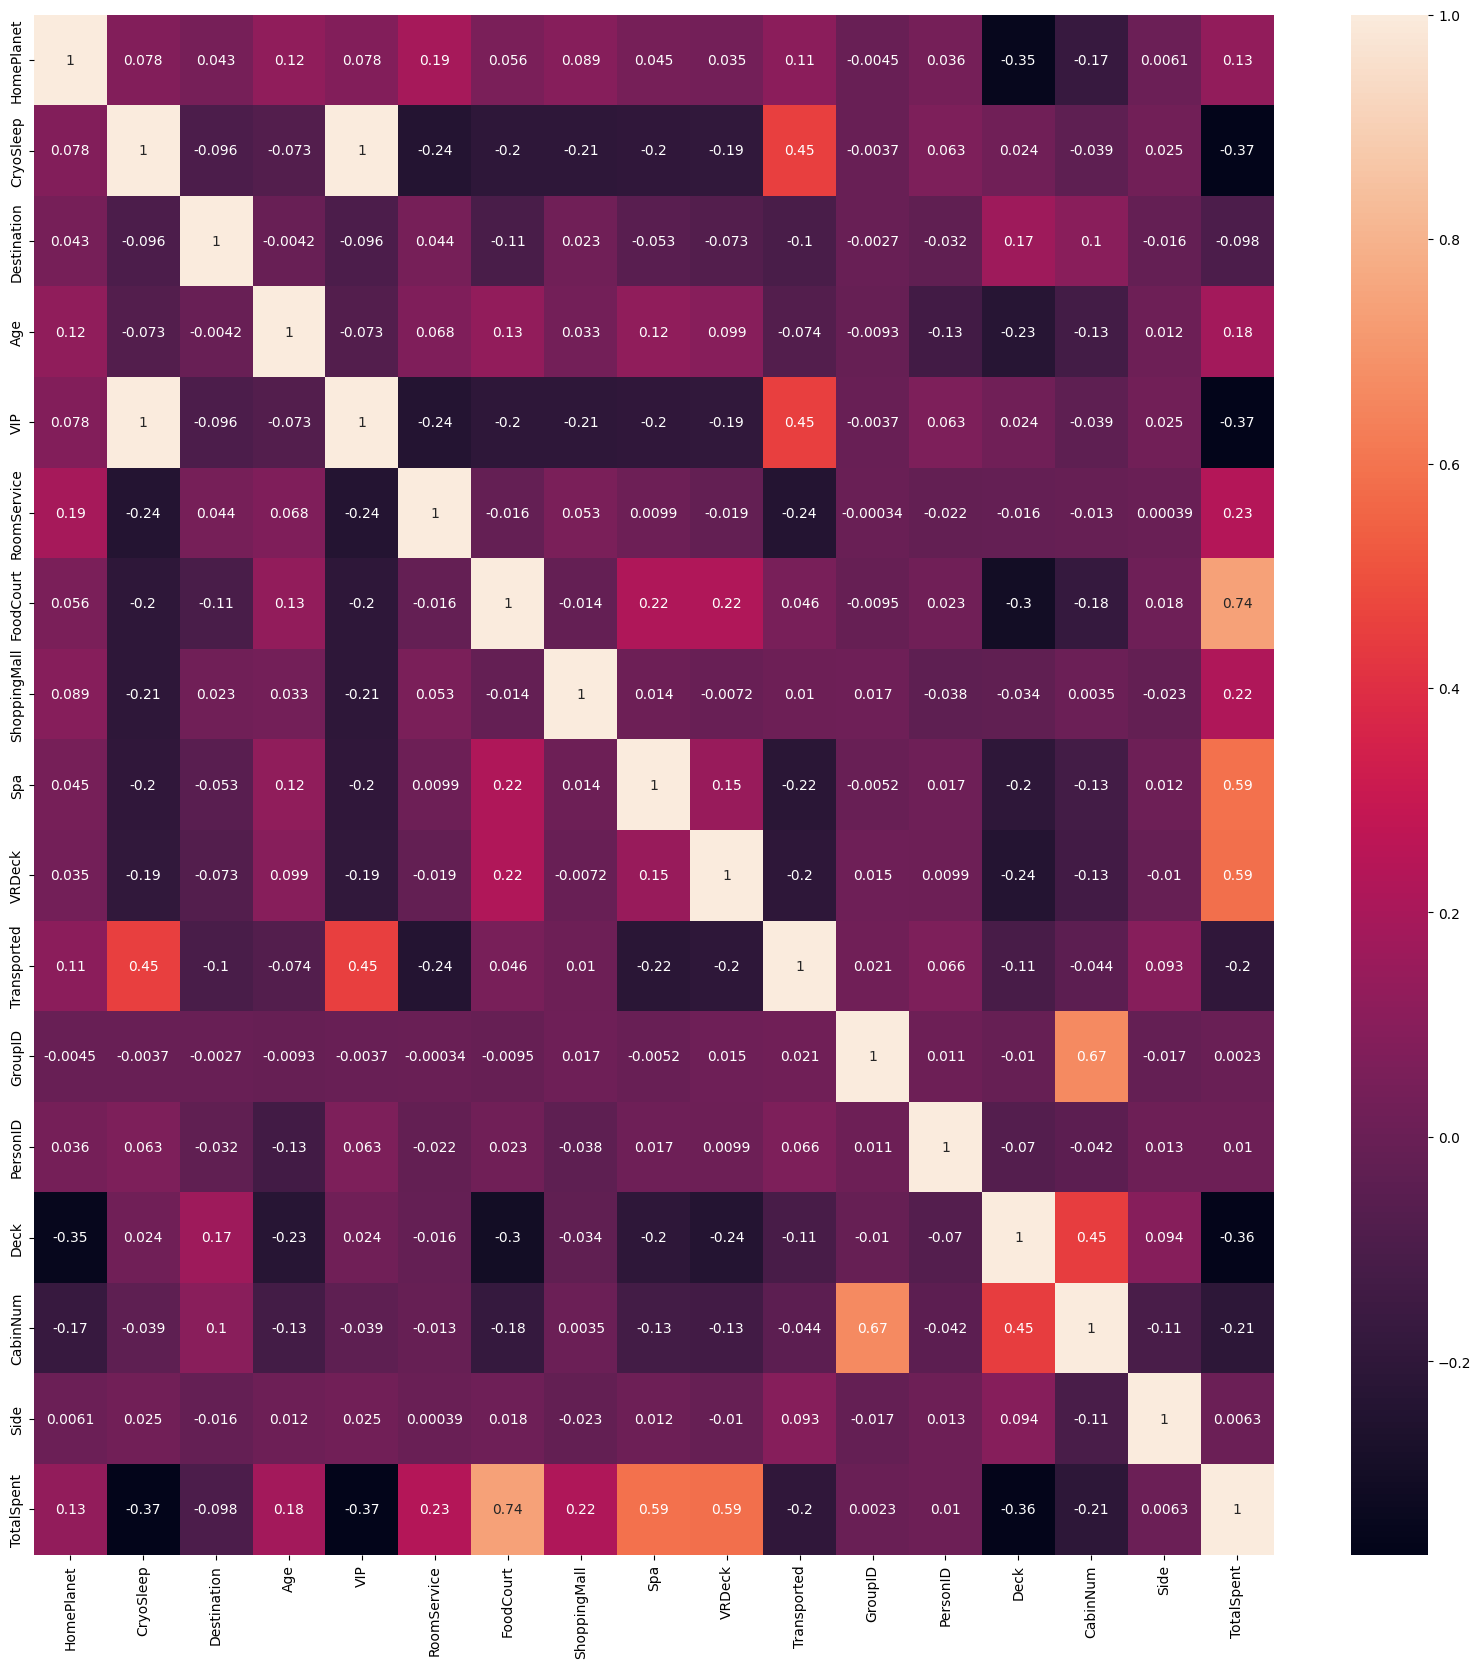

In [66]:
fig = plt.figure(figsize=(20,20))
sbn.heatmap(df.drop(['FirstName','LastName'],axis=1).corr(),annot=True)

<Axes: xlabel='Transported', ylabel='count'>

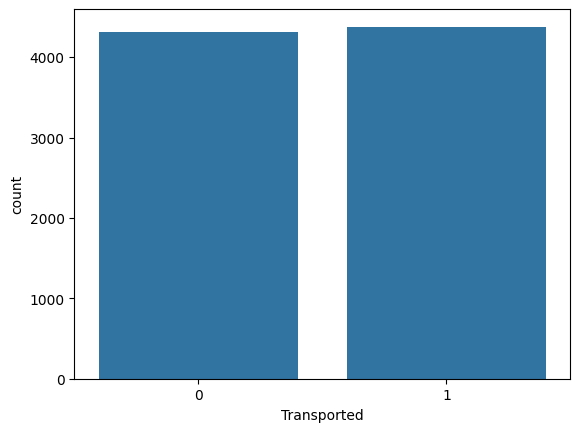

In [67]:
sbn.countplot(df,x='Transported')

In [68]:
df.drop(['FirstName','LastName'],axis=1,inplace=True)

In [69]:
df.dtypes

HomePlanet        int32
CryoSleep         int64
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
GroupID           int64
PersonID          int64
Deck              int32
CabinNum          int32
Side              int32
TotalSpent      float64
dtype: object

# Train Test Validate Split (70-15-15)

In [70]:
train_df, test_df = train_test_split(df,train_size=0.7,random_state=42)
test_df,val_df = train_test_split(test_df,test_size=0.5,random_state=42)

train_x = train_df.drop('Transported',axis=1)
train_y = train_df['Transported']

test_x = test_df.drop('Transported',axis=1)
test_y = test_df['Transported']

val_x = val_df.drop('Transported',axis=1)
val_y = val_df['Transported']

# Baseline Classifier

Baseline Accuracy = 0.7875766871165644
Baseline F1 = 0.7806809184481394


<Axes: >

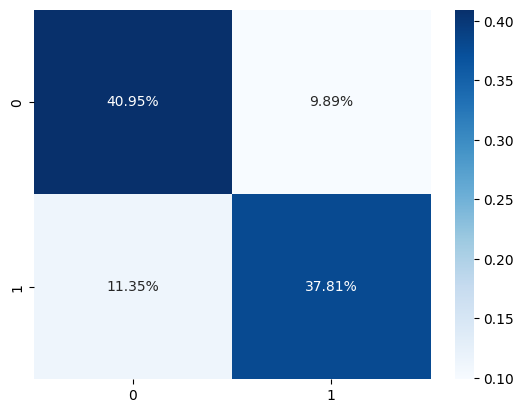

In [71]:
base_rf = RandomForestClassifier(random_state=42)
base_rf.fit(train_x,train_y)

base_rf_pred = base_rf.predict(test_x)

# y_true,y_pred
base_rf_acc = accuracy_score(test_y,base_rf_pred)
base_rf_f1 = f1_score(test_y,base_rf_pred)
base_rf_conf = confusion_matrix(test_y,base_rf_pred)

print(f'Baseline Accuracy = {base_rf_acc}')
print(f'Baseline F1 = {base_rf_f1}')
sbn.heatmap(base_rf_conf/np.sum(base_rf_conf),annot=True,fmt='.2%',cmap='Blues')

# Scale the Data

In [72]:
scaler = MinMaxScaler()
column_names = train_x.columns

train_x_sc = pd.DataFrame(scaler.fit_transform(train_x))
train_x_sc.columns = column_names

test_x_sc = pd.DataFrame(scaler.fit_transform(test_x))
test_x_sc.columns = column_names

val_x_sc = pd.DataFrame(scaler.fit_transform(val_x))
val_x_sc.columns = column_names

In [73]:
train_x_sc.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupID,PersonID,Deck,CabinNum,Side,TotalSpent
count,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000,6085.000000
mean,0.237853,0.367132,0.503643,0.365228,0.367132,0.015928,0.016977,0.007362,0.017025,0.012805,0.500024,0.074727,0.549425,0.312933,0.267872,0.048176
std,0.286922,0.482063,0.280119,0.181700,0.482063,0.047697,0.057768,0.026240,0.060201,0.048560,0.285622,0.152180,0.229859,0.270998,0.271773,0.091607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255766,0.000000,0.375000,0.082322,0.000000,0.000000
50%,0.000000,0.000000,0.666667,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498168,0.000000,0.625000,0.222164,0.500000,0.023718
75%,0.333333,1.000000,0.666667,0.468354,1.000000,0.005444,0.005266,0.001958,0.004738,0.003439,0.740354,0.142857,0.750000,0.522427,0.500000,0.047559
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest With Scaled Data

Baseline Accuracy = 0.7776073619631901
Baseline F1 = 0.7803030303030303


<Axes: >

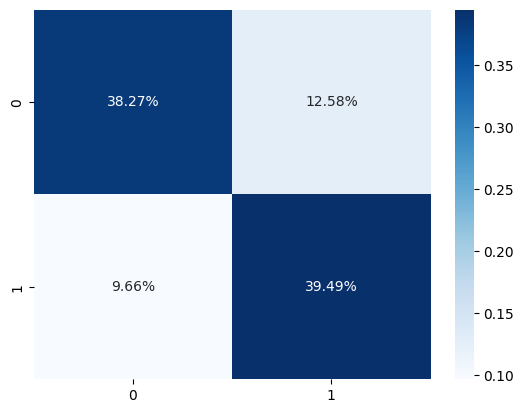

In [74]:
scaled_rf = RandomForestClassifier(random_state=42)
scaled_rf.fit(train_x_sc,train_y)

scaled_rf_pred = scaled_rf.predict(test_x_sc)

# y_true,y_pred
scaled_rf_acc = accuracy_score(test_y,scaled_rf_pred)
scaled_rf_f1 = f1_score(test_y,scaled_rf_pred)
scaled_rf_conf = confusion_matrix(test_y,scaled_rf_pred)

print(f'Baseline Accuracy = {scaled_rf_acc}')
print(f'Baseline F1 = {scaled_rf_f1}')
sbn.heatmap(scaled_rf_conf/np.sum(scaled_rf_conf),annot=True,fmt='.2%',cmap='Blues')